In [1]:
import src.models
from experiments.plotting import plot_score_variable_y, plot_score_error_variable_y

import orbax.checkpoint
from src.training import utils

Setup to load in checkpoint

In [6]:
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

y_min = -1.0
max_val = 1.0
checkpoint_path2 = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/ou/varied_y_{y_min}_to_{max_val}"

restored = orbax_checkpointer.restore(checkpoint_path2)
model = src.models.score_mlp.ScoreMLPDistributedEndpt(**restored["network"])
params = restored["params"]

trained_score2 = utils.trained_score_variable_y(model, params)


In [3]:
from src.data_generate_sde import sde_ornstein_uhlenbeck
from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes
import matplotlib.pyplot as plt

bundle = bundles.neurips2023()
plt.rcParams.update(bundle)
axes.lines()
plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))

true_score = sde_ornstein_uhlenbeck.score
cmap = "PuRd"

In [4]:
# plt.rcParams.update(figsizes.neurips2023(nrows=2, ncols=3))
# fig, axs = plot_score_variable_y(true_score, trained_score, -1, 1, -1, 1, cmap=cmap)
# plt.savefig('ou_score_varied_y_-1.0_to_1.0.pdf')
# plt.show()

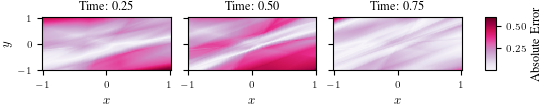

In [5]:
plt.rcParams.update(figsizes.neurips2023(nrows=1, ncols=3))
fig, axs = plot_score_error_variable_y(true_score, trained_score, -1, 1, -1, 1, cmap=cmap)
plt.savefig('ou_score_varied_y_-1.0_to_1.0_error.pdf')
plt.show()

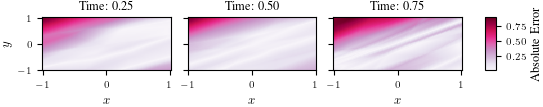

In [7]:
plt.rcParams.update(figsizes.neurips2023(nrows=1, ncols=3))
fig, axs = plot_score_error_variable_y(true_score, trained_score2, -1, 1, -1, 1, cmap=cmap)
plt.savefig('ou_score_varied_y_-1.0_to_1.0_error.pdf')
plt.show()